<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 2. <b>Кросс-валидация, регуляризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Куприянов" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43, 3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>27 апреля 2017</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-25%</b>, вторая неделя и далее до конца модуля <b>-50%</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [4]:
#0) Подключение библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])


# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

<p>1. Загрузка исходных данных</p>

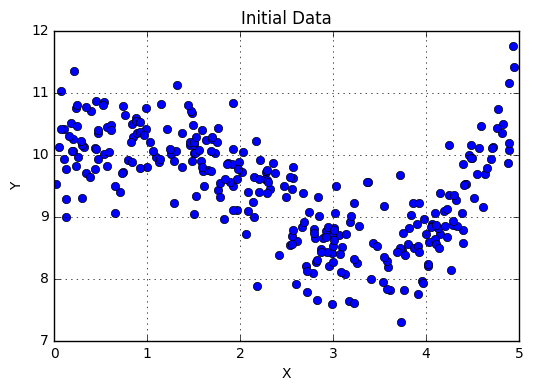

In [5]:
df = pd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [6]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold
x = x.reshape(-1,1)


# Способ 1
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

#Ваш код


kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

pf = [PolynomialFeatures(degree = i) for i in range(25)]

print(len(kf), '\n')

for train_indices, test_indices in kf:
    x_train = x_train_init[train_indices]
    x_val = x_train_init[test_indices]
    y_train = y_train_init[train_indices] 
    y_val =  y_train_init[test_indices]
    x_train = [p.fit_transform(x_train.reshape(-1, 1)) for p in pf]
    x_val = [p.fit_transform(x_val.reshape(-1, 1)) for p in pf]
    
    print(x_train_init[train_indices])
    print(x_train_init[test_indices])

4 

[[ 4.49012154]
 [ 1.7582632 ]
 [ 4.65457918]
 [ 1.69339566]
 [ 4.26966875]
 [ 4.22192897]
 [ 4.58887061]
 [ 1.68877323]
 [ 3.07350856]
 [ 4.24254591]
 [ 2.14746089]
 [ 1.28651444]
 [ 1.55141853]
 [ 0.45053367]
 [ 2.18059128]
 [ 1.31107831]
 [ 1.14391167]
 [ 2.98685824]
 [ 2.71732519]
 [ 1.49864936]
 [ 0.71085024]
 [ 3.00519477]
 [ 0.74266726]
 [ 3.60877659]
 [ 0.21548678]
 [ 2.81595342]
 [ 0.10582596]
 [ 0.18778838]
 [ 2.49253506]
 [ 4.88540363]
 [ 1.925568  ]
 [ 4.5141588 ]
 [ 1.52729959]
 [ 2.29362115]
 [ 0.04610551]
 [ 2.73793078]
 [ 4.29324508]
 [ 2.56096132]
 [ 0.18547207]
 [ 3.74401941]
 [ 2.94673856]
 [ 2.20916587]
 [ 4.02611598]
 [ 3.81620294]
 [ 3.91982143]
 [ 1.06593283]
 [ 3.57287892]
 [ 4.10608238]
 [ 0.23369614]
 [ 3.02788782]
 [ 3.16824117]
 [ 0.61254991]
 [ 3.90974559]
 [ 2.56561354]
 [ 3.42679909]
 [ 0.46720188]
 [ 4.06310481]
 [ 4.00034375]
 [ 1.96264622]
 [ 1.52286678]
 [ 3.7230162 ]
 [ 4.06658042]
 [ 2.08449204]
 [ 0.12216322]
 [ 3.22163308]
 [ 1.31701582]
 [ 4.2

<p>3. Обучение</p>

In [11]:
lin_reg = LinearRegression(normalize=True)
lin_reg = linReg.fit(x_train, y_train)

def plot_deg_train_val(name, deg, train, val, height=4, width=8):
    plt.figure(1, figsize=[width, height])
    plt.xticks(deg)
    plt.title(name)
    plt.plot(deg, train, color='orange', lw=2)
    plt.plot(deg, val, color='green', lw=2)
    plt.legend(["Train MSE", "Val MSE"])
    plt.grid(True)
    plt.show()
    
def lin_regr_fit_metrics(deg, x, y, x_val, y_val, metric=0):
    pl_lin_reg = Pipeline([("plF", PolynomialFeatures(degree=deg)), ("lr", lin_reg)])
    pl_lin_reg = pl_lin_reg.fit(x, y)
    if metric == 1:
        return mean_squared_error(y, pl_lin_reg.predict(x)), mean_squared_error(y_val, pl_lin_reg.predict(x_val))
    else:
        return pl_lin_reg.score(x, y), pl_lin_reg.score(x_val, y_val)

NameError: name 'linReg' is not defined

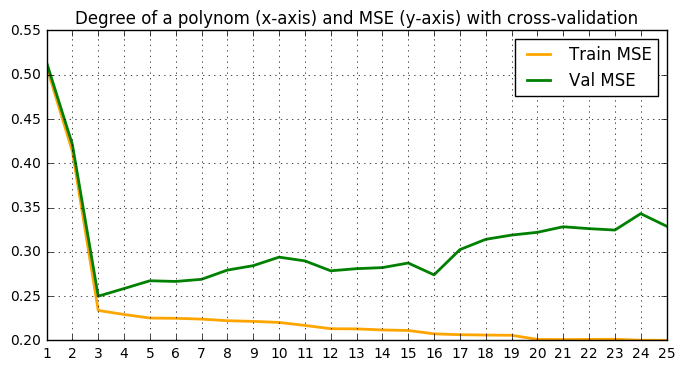

In [12]:
# Для способа 2
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

#Ваш код

deg, trainList, valList = [i for i in range(1,26)], [], []

for i in deg:
    trainDeg = []
    valDeg = []
    for train, val in kf:
        trainRes, valRes = lin_regr_fit_metrics(i, 
                                                x_train_init[train], 
                                                y_train_init[train],
                                                x_train_init[val],
                                                y_train_init[val], 
                                                metric=1)
        trainDeg.append(trainRes)
        valDeg.append(valRes)
    trainList.append(np.mean(trainDeg))
    valList.append(np.mean(valDeg))
    

plot_deg_train_val("Degree of a polynom (x-axis) and MSE (y-axis) with cross-validation", deg, trainList, valList)

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

In [21]:
mse1_y=[0 for x in range(25)]
mse2_y=[0 for x in range(25)]
R1 = [0 for x in range(25)]
R2 = [0 for x in range(25)]
for i in range(1, 25):
    plModelTr_PL = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
    plModelTr_PL = plModelTr_PL.fit(x_train, y_train)
    f_x = lambda x : polyval(x, plModelTr_PL.named_steps["lr"].coef_) + plModelTr_PL.named_steps["lr"].intercept_
    y_pr_val = plModelTr_PL.predict(x_val)
    y_pr_train = plModelTr_PL.predict(x_train)
    mse1_y[i] = mean_squared_error(y_train, y_pr_train)
    mse2_y[i] = mean_squared_error(y_val, y_pr_val)
    
plt.figure(1)
plt.title("Both")
plt.plot(mse1_y, "-o")
plt.plot(mse2_y, "-o", color = "green")
plt.grid(True)
plt.show()

ValueError: could not broadcast input array from shape (158,1) into shape (158)

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

In [ ]:
# Для способов 1 и 2

deg, train, val = [i for i in range(0,26)], [], []

#############################################################
############################ TODO############################
#############################################################

# Reg = [LinearRegression(normalize = True).fit(q, y_train) for q in x_train]
# y_pr_train = [Reg[i].predict(x_train[i]) for i in range(25)]
# y_pr_val = [Reg[i].predict(x_val[i]) for i in range(25)]


# for i in deg:
#     r2 = r2_score(val_res, train_res)
#     train.append(train_res)
#     val.append(val_res)

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [ ]:
# Для способов 1 и 2

# наилучшая степень для полинома - 3
pl_lin_regr = Pipeline([("plF", PolynomialFeatures(degree=3)), ("lr", lin_reg)])
pl_lin_regr = pl_lin_regr.fit(x_train_init, y_train_init)

<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [ ]:
# Для способов 1 и 2

mean_squared_error(y_test, pl_lin_regr.predict(x_test))

<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

In [ ]:
# Для способов 1 и 2
from numpy.polynomial.polynomial import polyval

f_x = lambda x : polyval(x, lin_reg.coef_) + lin_reg.intercept_
xx = np.linspace(0, 5, 100)

plt.title('test')
plt.plot(x_test, y_test, 'o')
plt.grid(True)
plt.plot(xx, f_x(xx), color = 'red', lw = 2)
plt.plot(x_test, f_x(x_test), 'o', color = 'red', lw = 2)
plt.vlines(x_test, ymin = y_test, ymax=f_x(x_test), colors = 'black', linestyles = 'dotted')
plt.show()

<p>9. Сравнение результатов для различных способов</p>

In [ ]:
# Малая MSE на тестовом подмножестве

<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

In [ ]:
df = pd.read_csv("data/Cl_A5_V"+str(2)+".csv") #variant - вариант задания

plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [ ]:
# Способ 1
x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

#Ваш код

<p>3. Обучение</p>

In [ ]:
#Параметры классификатора
#penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="lbfgs", random_state=12345

# Для способов 1 и 2

# Для способа 2
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

#Ваш код

<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

In [ ]:
# Для способов 1 и 2

#Ваш код

<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

In [ ]:
# Для способов 1 и 2

#Ваш код

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [ ]:
# Для способов 1 и 2

#Ваш код

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

In [ ]:
df = pnd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [ ]:
from sklearn.linear_model import Ridge

# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!

x_train_init, x_test, y_train_init, y_test = cross_validation.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = cross_validation.train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)
x_train_init=np.array([x_train_init]).T
x_test=np.array([x_test]).T


plModelTr = Pipeline([("plF", PolynomialFeatures(degree=16)), ("Ridge", Ridge(alpha=0, fit_intercept=True, normalize=True))])
plModelTr = plModelTr.fit(x_train_init, y_train_init)

#Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

#Для каждого значения коэф. регуляризации:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

#Ваш код

kf = cross_validation.KFold(n = len(x_train_init), n_folds = 4, shuffle = True, random_state = 0)

    
mse1 = [0 * len(alphas)]
mse2 = [0 * len(alphas)]
pf = [PolynomialFeatures(degree = i) for i in range(25)]

for TI, VI in kf:
    x_train = x_train_init[TI]
    x_val = x_train_init[VI]
    y_train = y_train_init[TI] 
    y_val =  y_train_init[VI]
    x_train = PolynomialFeatures(degree = 16).fit_transform(x_train.reshape(-1, 1))
    x_val = PolynomialFeatures(degree = 16).fit_transform(x_val.reshape(-1, 1))
       
    Reg2 = [Ridge(alpha = i, fit_intercept = True, normalize = True).fit(x_train, y_train) for i in alphas]
    y_pr_train = [plModelTr.predict(x_train) for plModelTr in Reg2]
    y_pr_val = [plModelTr.predict(x_val) for plModelTr in Reg2]
   
    mse_train = np.array([((t - y_train)**2).sum() for t in y_pr_train]) / len(y_train)
    mse_val = np.array([((t - y_val)**2).sum() for t in y_pr_val]) / len(y_val)
    mse1 = mse1 + 0.25 * mse_train
    mse2 = mse2 + 0.25 * mse_val

<p>3. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

In [ ]:
#Ваш код

##############
#### TODO ####
##############

<p>4. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

In [ ]:
#Ваш код

##############
#### TODO ####
##############

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [ ]:
a = alphas[list(mse2).index(min(mse2))]
a

<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [ ]:
plModelTr1 = Pipeline([("plF", PolynomialFeatures(degree=16)), ("Ridge", Ridge(alpha=0.00054555947811685149, fit_intercept=True, normalize=True))])
plModelTr1 = plModelTr1.fit(x_train_init, y_train_init)
y_test2 = plModelTr1.predict(x_test)

<p>9. Определить ошибку на тестовом подмножестве</p>

In [ ]:
mean_squared_error(y_test, y_test2)

<p>10. Построить график регрессии</p>

In [ ]:
xx = np.linspace(0, 5, 100)
f_x = lambda x : polyval(x, plModelTr1.named_steps["Ridge"].coef_) + plModelTr1.named_steps["Ridge"].intercept_

plt.figure(1, figsize=[16, 5])

plt.subplot(1,2,1)
plt.title('test')
plt.plot(x_test, y_test, 'o')
plt.grid(True)
plt.plot(xx, f_x(xx), color = 'orange', lw = 2)
plt.plot(x_test, f_x(x_test), 'o', color = 'red', lw = 2)
plt.vlines(x_test, ymin = y_test, ymax=f_x(x_test), colors = 'black', linestyles = 'dotted')

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

In [ ]:
#